# Problem 2 Logistic Regression

In [133]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [206]:
# Use weka to save the arff file as the csv file
# Then read the data from the CSV

disease_data=[]
csv_reader = csv.reader(open('realdata1/chronic_kidney_disease_full.csv', encoding='utf-8'))
for row in csv_reader:
    disease_data.append(row)
print(len(disease_data[1:]))
#print(disease_data[0:2])
arr=np.array(disease_data)
print(arr)

400
[['age' 'bp' 'sg' ..., 'pe' 'ane' 'class']
 ['48' '80' '1.020' ..., 'no' 'no' 'ckd']
 ['7' '50' '1.020' ..., 'no' 'no' 'ckd']
 ..., 
 ['12' '80' '1.020' ..., 'no' 'no' 'notckd']
 ['17' '60' '1.025' ..., 'no' 'no' 'notckd']
 ['58' '80' '1.025' ..., 'no' 'no' 'notckd']]


In [198]:
typex=['num','num','nom','nom','nom','nom','nom','nom','nom','num','num','num','num','num','num','num','num',\
       'nom','nom','nom','nom','nom','nom','nom']
avg=[0 for k in range(25)]
count=[0 for k in range(25)]
count_0=[0 for k in range(25)]
count_1=[0 for k in range(25)]
for i in range(1,len(disease_data)):
    #print(disease_data[i])
    for j in range(len(disease_data[i])):
        if(typex[j]=='num'):
            if(disease_data[i][j]!='?'):
                avg[j]+=float(disease_data[i][j])
                count[j]+=1
        #else:
            
#print(len(disease_data[0]))
print(avg)

IndexError: list index out of range

In [207]:
# Delete all the rows which contain missing values
# Replace all the nominal data with 0 and 1

dis_data=[]
dis_data.append(disease_data[0])
for i in range(1,len(disease_data)):
    w=True
    for j in range(len(disease_data[i])):
        if(disease_data[i][j]=='?'):
            w=False
            break
    if w:
        dis_data.append(disease_data[i])
print(len(dis_data[1:]))
print(dis_data[0:3])

dis_data2=[]
dis_data2.append(dis_data[0])
for i in range(1,len(dis_data)):
    line=dis_data[i]
    for j in range(len(line)):
        if line[j]=='normal':
            line[j]='0'
        elif(line[j]=='abnormal'):
            line[j]='1'
        elif(line[j]=='present'):
            line[j]='0'
        elif(line[j]=='notpresent'):
            line[j]='1'
        elif(line[j]=='yes'):
            line[j]='0'
        elif(line[j]=='no'):
            line[j]='1'
        elif(line[j]=='good'):
            line[j]='0'
        elif(line[j]=='poor'):
            line[j]='1'
        elif(line[j]=='ckd'):
            line[j]='0'
        elif(line[j]=='notckd'):
            line[j]='1'
        line[j]=float(line[j])
    dis_data2.append(line)

print(dis_data2[0:3])

158
[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'], ['48', '70', '1.005', '4', '0', 'normal', 'abnormal', 'present', 'notpresent', '117', '56', '3.8', '111', '2.5', '11.2', '32', '6700', '3.9', 'yes', 'no', 'no', 'poor', 'yes', 'yes', 'ckd'], ['53', '90', '1.020', '2', '0', 'abnormal', 'abnormal', 'present', 'notpresent', '70', '107', '7.2', '114', '3.7', '9.5', '29', '12100', '3.7', 'yes', 'yes', 'no', 'poor', 'no', 'yes', 'ckd']]
[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'], [48.0, 70.0, 1.005, 4.0, 0.0, 0.0, 1.0, 0.0, 1.0, 117.0, 56.0, 3.8, 111.0, 2.5, 11.2, 32.0, 6700.0, 3.9, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [53.0, 90.0, 1.02, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 70.0, 107.0, 7.2, 114.0, 3.7, 9.5, 29.0, 12100.0, 3.7, 0.0, 0.0, 1.0, 1.

In [208]:
from sklearn.model_selection import train_test_split
xx=[]
yy=[]
for i in range(1,len(dis_data2)):
    xx.append(dis_data2[i][:-1])
    yy.append(dis_data2[i][-1])
X=np.array(xx)
y=np.array(yy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

126
126
32
32


In [209]:
#standardization of the data (on delete data with missing value)

#print(dis_data2[0:3])

d=[[] for i in range(24)]

for i in range(1,len(dis_data2)):
    line=dis_data2[i]
    for j in range(len(line)-1):
        d[j].append(line[j])
    
darr= np.array(d)
#print(darr)
mean= [0]*24
SD= [0]*24
for i in range(len(darr)):
    sumd=0
    for j in range(len(darr[i])):
        sumd+=darr[i][j]
    mean[i]=sumd/darr.shape[1]
    for j in range(len(darr[i])):
        sumd+=(darr[i][j]-mean[i])**2
    SD[i]=math.sqrt(sumd/darr.shape[1])
#print(mean)
#print(SD)

dis_data3=[]
for i in range(1,len(dis_data2)):
    line= []
    for j in range(len(dis_data2[i])-1):
        line.append((dis_data2[i][j]-mean[j])/SD[j])
    dis_data3.append(line)

print(dis_data2[0:3])    
print(np.array(dis_data3).shape)
print(np.array(dis_data3)[0:3])

[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'], [48.0, 70.0, 1.005, 4.0, 0.0, 0.0, 1.0, 0.0, 1.0, 117.0, 56.0, 3.8, 111.0, 2.5, 11.2, 32.0, 6700.0, 3.9, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [53.0, 90.0, 1.02, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 70.0, 107.0, 7.2, 114.0, 3.7, 9.5, 29.0, 12100.0, 3.7, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]]
(158, 24)
[[ -9.20108423e-02  -2.87757451e-01  -1.47275750e-02   1.92014114e+00
   -2.65302393e-01  -2.45769576e-01   1.41400115e+00  -9.14991422e-01
    7.61693689e-02  -2.18156848e-01   7.16353519e-02   4.73113422e-01
   -1.99637188e+00  -5.23721483e-01  -5.31005101e-01  -8.89572887e-01
   -5.69519629e-01  -4.07467909e-01  -8.03637563e-01   1.80065240e-01
    6.97895930e-02   1.85037510e+00  -8.80500368e-01  -9.03378079e-01]
 [  2.02274848e-01   1.13304496e+00   1.25341063e-04   7.21001614e-01
   -2.65302393e-01   1.91154115e+00   1.414

In [210]:
xxstd=[]
yystd=[]
for i in range(len(dis_data3)):
    xxstd.append(dis_data3[i])
Xstd=np.array(xx)
    
for i in range(1,len(dis_data2)):
    yystd.append(dis_data2[i][-1])
ystd=np.array(yy)

X_train_STD, X_test_STD, y_train_STD, y_test_STD = train_test_split(Xstd, ystd, test_size=0.2, random_state=42)
print(len(X_train_STD))
print(len(y_train_STD))
print(len(X_test_STD))
print(len(y_test_STD))

126
126
32
32


In [213]:
# This is the implementation of the Logistic Regression

class LR:
    def __init__(self):
        self.dim = 24
        #self.w = np.random.random(self.dim)
        self.w = np.array([1.0]*self.dim)
        self.b = 0
        self.eta = 0.2
        
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))
    
    def logistic_regression(self,x,y,eta):
        itr = 0
        self.eta = eta
        row, column = np.shape(x)
        #print(row, column)
        while itr <= 10000:
            fx = np.dot(self.w, x.T) + self.b
            hx = self.sigmoid(fx)
            t = (hx-y)
            #print(hx)
            s=[]
            for i in range(len(x)):
                ss=[]
                for j in range(len(x[i])):
                    ss.append(x[i][j]*t[i])
                s.append(ss)
            gradient_w = np.sum(s, 0)/row * self.eta
            gradient_b = np.sum(t, 0)/row * self.eta
            self.w -= gradient_w
            self.b -= gradient_b
            itr+=1
        #print(hx)
        return (hx, self.w, self.b)
            

In [100]:
lr = LR()
nw, nb= lr.logistic_regression(X_train,y_train,eta=-2)
    
fx = np.dot(nw, X_test.T) + nb
y_pred = lr.sigmoid(fx)

print(y_pred)
print(y_test)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.]


In [101]:
from sklearn.metrics import confusion_matrix
result= confusion_matrix(y_test, y_pred)
print(result)

TN, FP, FN, TP = result.ravel()
print(TN,FP,FN,TP)
Pre=TP/(TP+FP)
Rec=TP/(TP+FN)
f_measure= 2*Pre*Rec/(Pre+Rec)
print(f_measure)

[[ 0  9]
 [ 0 23]]
0 9 0 23
0.836363636364


In [175]:
f_list_train=[]
f_list_test=[]
rg= np.arange(-2,4.2,0.2)
for i in rg:
    print('i=%f' %i)
    lr = LR()
    yy, nw, nb= lr.logistic_regression(X_train,y_train,eta=i)
    result= confusion_matrix(y_train, yy)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('train f-measure: %f' %f_measure)
    f_list_train.append(f_measure)
    
    fx = np.dot(nw, X_test.T) + nb
    y_pred = lr.sigmoid(fx)
    result= confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('test f-measure: %f' %f_measure)
    f_list_test.append(f_measure)

i=-2.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.800000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.600000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.400000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.200000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.800000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.600000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.400000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.200000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=0.200000


C:\Users\Administrator.2013-20160702VU\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


train f-measure: 0.989130
test f-measure: 0.978723
i=0.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=0.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=0.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.400000
train f-

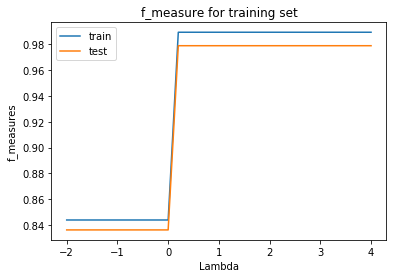

In [187]:
plt.title("f_measure for training set")
plt.xlabel("Lambda")
plt.ylabel("f_measures")
plt.plot(np.arange(-2, 4.1, 0.2), f_list_train,label='train')
plt.plot(np.arange(-2, 4.1, 0.2), f_list_test,label='test')
plt.legend(loc='best')
plt.show()

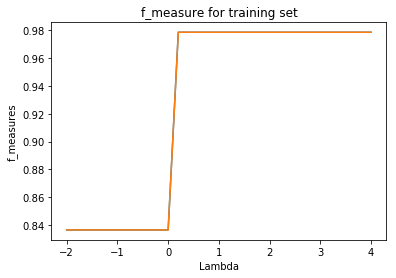

In [181]:
plt.title("f_measure for training set")
plt.xlabel("Lambda")
plt.ylabel("f_measures")
plt.plot(np.arange(-2, 4.1, 0.2), f_list_test)
plt.show()

In [214]:
f_list_train=[]
f_list_test=[]
rg= np.arange(-2,4.2,0.2)
for i in rg:
    print('i=%f' %i)
    lr = LR()
    yy, nw, nb= lr.logistic_regression(X_train_STD,y_train_STD,eta=i)
    result= confusion_matrix(y_train_STD, yy)
    #print(y_train_STD)
    #print(yy)
    #print(result)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('train f-measure: %f' %f_measure)
    f_list_train.append(f_measure)
    
    fx = np.dot(nw, X_test_STD.T) + nb
    y_pred = lr.sigmoid(fx)
    result= confusion_matrix(y_test_STD, y_pred)
    #print(result)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('test f-measure: %f' %f_measure)
    f_list_test.append(f_measure)
    

i=-2.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.800000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.600000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.400000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.200000
train f-measure: 0.844037
test f-measure: 0.836364
i=-1.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.800000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.600000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.400000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.200000
train f-measure: 0.844037
test f-measure: 0.836364
i=-0.000000
train f-measure: 0.844037
test f-measure: 0.836364
i=0.200000


C:\Users\Administrator.2013-20160702VU\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


train f-measure: 0.989130
test f-measure: 0.978723
i=0.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=0.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=0.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=1.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.400000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.600000
train f-measure: 0.989130
test f-measure: 0.978723
i=2.800000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.000000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.200000
train f-measure: 0.989130
test f-measure: 0.978723
i=3.400000
train f-

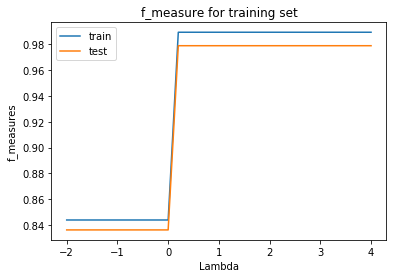

In [215]:
plt.title("f_measure for training set")
plt.xlabel("Lambda")
plt.ylabel("f_measures")
plt.plot(np.arange(-2, 4.1, 0.2), f_list_train,label='train')
plt.plot(np.arange(-2, 4.1, 0.2), f_list_test,label='test')
plt.legend(loc='best')
plt.show()